<a href="https://colab.research.google.com/github/kennethmao/Is-There-Really-Home-Game-Advantage/blob/main/IEOR_165_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# **Upload Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


# **Format Data**

In [3]:
data = pd.read_csv('winequality-red.csv', sep = ';', header = None)
header = data.iloc[0] #take the first row as header
data_final = data[1:].astype(float) #set data as everything but header
data_final.columns = header #include header
data_final.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


# **Split Data to Training and Testing (80/20) sets**

In [4]:
target_column = ['quality'] 
predictors = list(set(list(data_final.columns))-set(target_column))
X = data_final[predictors].values
Y = data_final[target_column].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

# **Ordinary Least Squares (OLS)**

In [5]:
OLS = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, Y_train)
pred_train_OLS = OLS.predict(X_train)
pred_test_OLS = OLS.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [6]:
print("Training Data Results:")
print("Mean squared error: %s" % mean_squared_error(Y_train,pred_train_OLS))
print("R Squared: %s" % r2_score(Y_train, pred_train_OLS))


Training Data Results:
Mean squared error: 0.4191413560014409
R Squared: 0.34351381439422657


In [7]:
print("Testing Data Results:")
print("Mean squared error: %s" % mean_squared_error(Y_test,pred_test_OLS))
print("R Squared: %s" % r2_score(Y_test, pred_test_OLS))

Testing Data Results:
Mean squared error: 0.40938401510422545
R Squared: 0.41833853912568597


The model performed well on the testing data, which indicates that there is no overfitting

# **Coefficient of OLS Model**

In [8]:
coeff_OLS = pd.DataFrame(np.append(OLS.intercept_,OLS.coef_.transpose()), ['Intercept'] + predictors, columns=['Coefficients']) 
coeff_OLS

,Coefficients
Intercept,21.201403
residual sugar,0.015139
free sulfur dioxide,0.004230
alcohol,0.271437
pH,-0.393833
citric acid,-0.174033
fixed acidity,0.027243
sulphates,0.833811
chlorides,-1.810628
volatile acidity,-1.034351


# **Ridge Regression (RR)**

In [9]:
#Using k-fold CV to find alpha parameter for ridge regression

RR = Ridge(fit_intercept=True, normalize=True)
parameters = np.arange(0, 50, 0.01)

ridge_regressor = GridSearchCV(RR, {'alpha': parameters} , scoring="neg_mean_squared_error",
                               cv=10,return_train_score = True)

ridge_regressor.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid={'alpha': array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.997e+01, 4.998e+01,
       4.999e+01])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [10]:
cve_error = -1* ridge_regressor.best_score_ # error is negative score
print("After k-fold cv, we found the best alpha value to be %s with error of %s" 
      % (ridge_regressor.best_params_['alpha'], cve_error) )

After k-fold cv, we found the best alpha value to be 0.05 with error of 0.4271652986021971


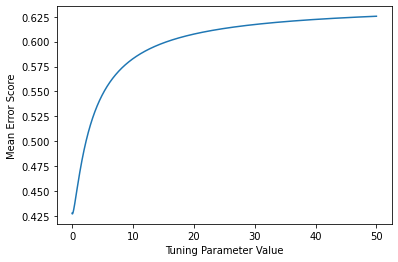

In [11]:
plt.xlabel("Tuning Parameter Value")
plt.ylabel("Mean Error Score")
plt.plot(parameters, -1*ridge_regressor.cv_results_["mean_test_score"])
plt.show()

Next we will use a more specific range of values to fine tuning our parameter

In [12]:
fine_RR = Ridge(fit_intercept=True, normalize=True)
parameters = np.arange(0, .1, 0.001)

ridge_regressor = GridSearchCV(fine_RR, {'alpha': parameters} , scoring="neg_mean_squared_error",
                               cv=10,return_train_score = True)

ridge_regressor.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid={'alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.0...0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [13]:
cve_error = -1* ridge_regressor.best_score_ # error is negative score
print("After a finer tune, we found the best alpha value to be %s with error of %s" 
      % (ridge_regressor.best_params_['alpha'], cve_error) )

After a finer tune, we found the best alpha value to be 0.054 with error of 0.4271624146385548


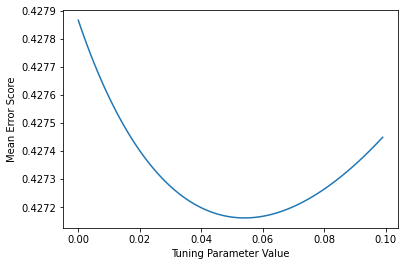

In [14]:
plt.xlabel("Tuning Parameter Value")
plt.ylabel("Mean Error Score")
plt.plot(parameters, -1*ridge_regressor.cv_results_["mean_test_score"])
plt.show()

In [15]:
# test cv ridge regression model on training and test set
cv_RR = Ridge(fit_intercept=True, normalize=True, alpha = 0.054).fit(X_train, Y_train)

pred_train_RR= cv_RR.predict(X_train)
pred_test_RR= cv_RR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [16]:
print("Training Data Results:")
print("Mean squared error: %s" % mean_squared_error(Y_train,pred_train_RR))
print("R Squared: %s" % r2_score(Y_train, pred_train_RR))

Training Data Results:
Mean squared error: 0.41966708492918725
R Squared: 0.34269038388922624


In [17]:
print("Testing Data Results:")
print("Mean squared error: %s" % mean_squared_error(Y_test,pred_test_RR))
print("R Squared: %s" % r2_score(Y_test, pred_test_RR))

Testing Data Results:
Mean squared error: 0.412711953757419
R Squared: 0.41361013355219567


The model fits the testing data well. Using all the data, we will proceed to train a ridge regression model with the optimal alpha and display the weights of the features in a table.

# **Coefficients of Ridge Regression model**

In [18]:
coeff_RR = pd.DataFrame(np.append(cv_RR.intercept_,cv_RR.coef_.transpose()), ['Intercept'] + predictors, columns=['Coefficients']) 
coeff_RR

,Coefficients
Intercept,30.979037
residual sugar,0.017597
free sulfur dioxide,0.003576
alcohol,0.248620
pH,-0.293352
citric acid,-0.074723
fixed acidity,0.032257
sulphates,0.801991
chlorides,-1.745374
volatile acidity,-0.968760


# **Lasso Regression**

In [19]:
#Using k-fold CV to find alpha parameter for lasso regression

LR = Lasso(fit_intercept=True, normalize=True)
parameters = np.arange(0, 50, 0.1)

lasso_regressor = GridSearchCV(LR, {'alpha': parameters} , scoring="neg_mean_squared_error",
                               cv=10,return_train_score = True)

lasso_regressor.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight fo

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9...
       44. , 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. ,
       45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1,
       46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2,
       47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3,
       48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4,
       49.5, 49.6, 49.7, 49.8, 49.9])},
             return_train_score=True,

In [20]:
cv_error_LR = -1* lasso_regressor.best_score_ # error is negative score
print("After k-fold cv, we found best alpha value to be %s with error of %s" 
      % (lasso_regressor.best_params_['alpha'], cv_error_LR) )

After k-fold cv, we found best alpha value to be 0.0 with error of 0.42786726699359284


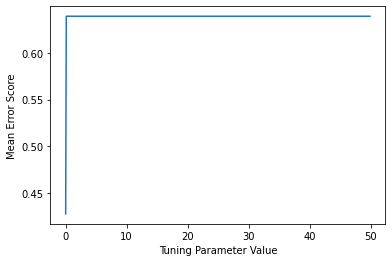

In [21]:
plt.xlabel("Tuning Parameter Value")
plt.ylabel("Mean Error Score")
plt.plot(parameters, -1*lasso_regressor.cv_results_["mean_test_score"])
plt.show()

For a finer tune

In [22]:
LR = Lasso(fit_intercept=True, normalize=True)
parameters = np.arange(0, .01, 0.0001)

lasso_regressor = GridSearchCV(LR, {'alpha': parameters} , scoring="neg_mean_squared_error",
                               cv=10,return_train_score = True)

lasso_regressor.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you w

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039...
       0.0056, 0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063,
       0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071,
       0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079,
       0.008 , 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087,
       0.0088, 0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095,
       0.0096, 0.0097, 0.0098, 0.0099])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [23]:
cv_error_LR = -1* lasso_regressor.best_score_ # error is negative score
print("After k-fold cv, we found best alpha value to be %s with error of %s" 
      % (lasso_regressor.best_params_['alpha'], cv_error_LR) )

After k-fold cv, we found best alpha value to be 0.0002 with error of 0.4276230074031112


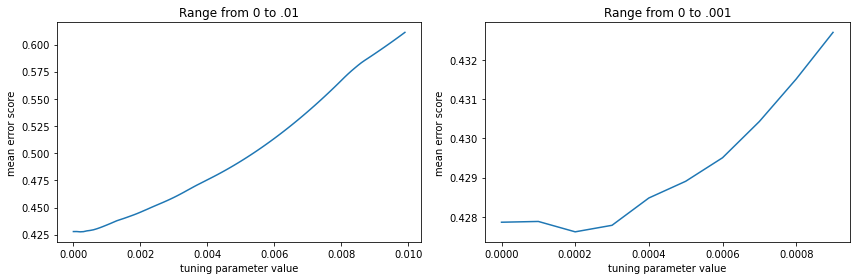

In [24]:
x1 = np.arange(0, .01, 0.0001)
x2 = np.arange(0, .001, 0.0001)

y1 = -1*lasso_regressor.cv_results_["mean_test_score"]
y2 = -1*lasso_regressor.cv_results_["mean_test_score"][:10]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x1, y1)
plt.title('Range from 0 to .01')
plt.ylabel("mean error score")
plt.xlabel("tuning parameter value")

plt.subplot(1, 2, 2)
plt.plot(x2, y2)
plt.title('Range from 0 to .001')
plt.xlabel("tuning parameter value")
plt.ylabel("mean error score")
plt.tight_layout()

plt.show()

In [25]:
# test cv lasso regression model on training and test set

cv_LR = Lasso(fit_intercept=True, normalize=True, alpha = .0002).fit(X_train, Y_train) 
pred_train_LR= cv_LR.predict(X_train)
pred_test_LR= cv_LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [26]:
print("Training Data Results:")
print("Mean squared error: %s" % mean_squared_error(Y_train,pred_train_LR))
print("R Squared: %s" % r2_score(Y_train, pred_train_LR))

Training Data Results:
Mean squared error: 0.42033659024836295
R Squared: 0.34164176154038095


In [27]:
print("Testing Data Results:")
print("Mean squared error: %s" % mean_squared_error(Y_test,pred_test_LR))
print("R Squared: %s" % r2_score(Y_test, pred_test_LR))

Testing Data Results:
Mean squared error: 0.4130422159724819
R Squared: 0.4131408900170367


# **Coefficients of Lasso Model**

In [28]:
coeff_LR = pd.DataFrame(np.append(cv_LR.intercept_,cv_LR.coef_.transpose()), ['Intercept'] + predictors, columns=['Coefficients']) 
coeff_LR

,Coefficients
Intercept,4.199620
residual sugar,0.001633
free sulfur dioxide,0.002712
alcohol,0.280747
pH,-0.379683
citric acid,-0.000000
fixed acidity,0.002451
sulphates,0.743083
chlorides,-1.677068
volatile acidity,-0.981866


A slight change in alpha value drasitcally changes our feature weights. Consider, the case when we use alpha = 0 instead of .0002. We get a table that is much more similar to our previous models.

In [29]:
cv_LR0 = Lasso(fit_intercept=True, normalize=True, alpha = 0).fit(X_train, Y_train) 

coeff_LR0 = pd.DataFrame(np.append(cv_LR0.intercept_,cv_LR0.coef_.transpose()), ['Intercept'] + predictors, columns=['Coefficients']) 
coeff_LR0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_co

,Coefficients
Intercept,21.201403
residual sugar,0.015139
free sulfur dioxide,0.004230
alcohol,0.271437
pH,-0.393833
citric acid,-0.174033
fixed acidity,0.027243
sulphates,0.833811
chlorides,-1.810628
volatile acidity,-1.034351


# **Elastic Net**

In [30]:
#Using k-fold CV to find alpha and l1_ratio parameters for ElasticNet

EN = ElasticNet(fit_intercept=True, normalize=True)

alphas1 = np.arange(0,5,.1)
l1_ratio1 = np.arange(0.0, 1, 0.1)
parametersGrid = {"alpha": alphas1,
                      "l1_ratio": l1_ratio1}

EN_regressor = GridSearchCV(EN, parametersGrid, scoring="neg_mean_squared_error",cv=5,return_train_score = True)
EN_regressor.fit(X_train,Y_train)

best_alpha =EN_regressor.best_params_['alpha']
best_l1_ratio = round(EN_regressor.best_params_['l1_ratio'],3)

Streaming output truncated to the last 5000 lines.

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight par

In [31]:
print("After k-fold cv, we found the best alpha value to be %s, and l1_ratio to be %s with error of %s" 
      % (best_alpha,best_l1_ratio, -1* EN_regressor.best_score_) )

After k-fold cv, we found the best alpha value to be 0.0, and l1_ratio to be 0.0 with error of 0.4300819350663784


Fine tune

In [32]:
EN1 = ElasticNet(fit_intercept=True, normalize=True)

alphas2 = np.arange(0,.5,.1)
l1_ratio2 = np.arange(0.0, .005, .001)
parametersGrid = {"alpha": alphas2,
                      "l1_ratio": l1_ratio2}

EN_regressor2 = GridSearchCV(EN1, parametersGrid, scoring="neg_mean_squared_error",cv=5,return_train_score = True)
EN_regressor2.fit(X_train,Y_train)

best_alpha2 = EN_regressor2.best_params_['alpha']
best_l1_ratio2 = round(EN_regressor2.best_params_['l1_ratio'],3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advi

In [33]:
print("After k-fold cv, we found the best alpha value to be %s, and l1_ratio to be %s with error of %s" 
      % (best_alpha2,best_l1_ratio2, -1*EN_regressor2.best_score_) )

After k-fold cv, we found the best alpha value to be 0.0, and l1_ratio to be 0.0 with error of 0.4300819350663784


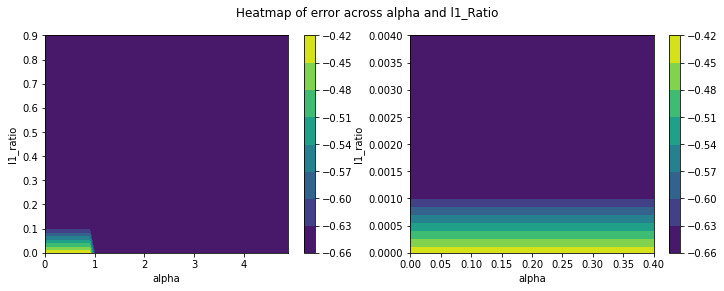

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Heatmap of error across alpha and l1_Ratio ')

X1, Y1 = np.meshgrid(alphas1, l1_ratio1)
Z1 = np.reshape(EN_regressor.cv_results_['mean_test_score'], X1.shape)

p_plot = ax1.contourf(X1, Y1, Z1)
fig.colorbar(p_plot, ax=ax1)
ax1.set(xlabel='alpha', ylabel='l1_ratio')

X2, Y2 = np.meshgrid(alphas2, l1_ratio2)
Z2 = np.reshape(EN_regressor2.cv_results_['mean_test_score'], X2.shape)

run_plot = ax2.contourf(X2, Y2, Z2)
fig.colorbar(run_plot, ax=ax2)
ax2.set(xlabel='alpha', ylabel='l1_ratio')

plt.show()

# **Coefficients of the Elastic Net model**

In [35]:
cv_EN = ElasticNet(fit_intercept=True, normalize=True, alpha = 0, l1_ratio = .00).fit(X_train, Y_train) 

coeff_EN = pd.DataFrame(np.append(cv_EN.intercept_,cv_EN.coef_.transpose()), ['Intercept'] + predictors, columns=['Coefficients']) 
coeff_EN

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the Line

,Coefficients
Intercept,21.201403
residual sugar,0.015139
free sulfur dioxide,0.004230
alcohol,0.271437
pH,-0.393833
citric acid,-0.174033
fixed acidity,0.027243
sulphates,0.833811
chlorides,-1.810628
volatile acidity,-1.034351


In [36]:
# test cv lasso regression model on training and test set

cv_EN = ElasticNet(fit_intercept=True, normalize=True, alpha = 0, l1_ratio = 0).fit(X_train, Y_train) 
pred_train_EN = cv_EN.predict(X_train)
pred_test_EN = cv_EN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the Line

In [37]:
print("Training Data Results:")
print("Mean squared error: %s" % mean_squared_error(Y_train,pred_train_EN))
print("R Squared: %s" % r2_score(Y_train, pred_train_EN))

Training Data Results:
Mean squared error: 0.419141356001441
R Squared: 0.34351381439422646


In [38]:
print("Testing Data Results:")
print("Mean squared error: %s" % mean_squared_error(Y_test,pred_test_EN))
print("R Squared: %s" % r2_score(Y_test, pred_test_EN))

Testing Data Results:
Mean squared error: 0.4093840151042241
R Squared: 0.41833853912568786


**Conclusion: OLS and Elastic Net barely have the best MSE and R^2 values although all the MSE and R^2 values are very close for the 4 models tested**